In [ ]:
# 예제 6.1 신경망 학습을 구현하는 데 필요한 라이브러리 선언

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%tensorflow_version 1.x
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
# 예제 6.2 input_data 함수를 호출해 MNIST 데이터세트를 내려받는 코드

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [ ]:
# 예제 6.3 합성곱 신경망 구축하기

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784], name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10], name="y-in")
keep_prob = tf.placeholder("float")

x_image = tf.reshape(x,[-1,28,28,1])
hidden_1 = slim.conv2d(x_image,5,[5,5])
pool_1 = slim.max_pool2d(hidden_1,[2,2])
hidden_2 = slim.conv2d(pool_1,5,[5,5])
pool_2 = slim.max_pool2d(hidden_2,[2,2])
hidden_3 = slim.conv2d(pool_2,20,[5,5])
hidden_3 = slim.dropout(hidden_3,keep_prob)
out_y = slim.fully_connected(
    slim.flatten(hidden_3),
    10,
    activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)


Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.flatten instead.


In [ ]:
# 예제 6.4 합성곱 신경망이 데이터를 입력받는 부분

x = tf.placeholder(tf.float32, [None, 784], name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10], name="y-in")
keep_prob = tf.placeholder("float")

In [ ]:
# 예제 6.5 합성곱 신경망의 은닉층과 결과 층을 구현한 코드

x_image = tf.reshape(x,[-1,28,28,1])
hidden_1 = slim.conv2d(x_image,5,[5,5])
pool_1 = slim.max_pool2d(hidden_1,[2,2])
hidden_2 = slim.conv2d(pool_1,5,[5,5])
pool_2 = slim.max_pool2d(hidden_2,[2,2])
hidden_3 = slim.conv2d(pool_2,20,[5,5])
hidden_3 = slim.dropout(hidden_3,keep_prob)
out_y = slim.fully_connected(
    slim.flatten(hidden_3),
    10,
    activation_fn=tf.nn.softmax)

In [ ]:
# 예제 6.6 합성곱 신경망 모델이 비중과 바이어스를 학습할 수 있도록 기준을 부여하는 코드

cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y, 1), tf.argmax(true_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [ ]:
# 예제 6.7 직접 구현한 합성곱 신경망을 학습시키는 코드

batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step,
            feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy,
                feed_dict={x:batch[0],
                    true_y:batch[1],
                    keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))

step 100, training accuracy 0.24
step 200, training accuracy 0.72
step 300, training accuracy 0.72
step 400, training accuracy 0.86
step 500, training accuracy 0.8
step 600, training accuracy 0.88
step 700, training accuracy 0.88
step 800, training accuracy 0.92
step 900, training accuracy 0.9


In [ ]:
# 예제 6.8 테스트 데이터를 활용해 학습된 신경망의 정확도를 구하는 코드

testAccuracy = sess.run(accuracy,
        feed_dict={x: mnist.test.images,
            true_y: mnist.test.labels,
            keep_prob: 1.0})

print("test accuracy %g"%(testAccuracy))


test accuracy 0.9007


(784,)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


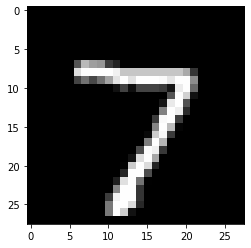

In [ ]:
# 예제 6.9 테스트 데이터 0번을 시각화하는 코드

index = 0
imageToUse = mnist.test.images[index]
imageLabel = mnist.test.labels[index]
print(imageToUse.shape)
print(imageLabel)
plt.imshow(np.reshape(imageToUse, [28,28]),
        interpolation="nearest", cmap="gray")

In [ ]:
# 예제 6.10 합성곱 신경망이 0번째 손글씨 이미지를 예측하는 코드

image_in = np.reshape(imageToUse, [1, 784])
arg_max = tf.argmax(out_y, 1)
predict = sess.run(arg_max,
        feed_dict={x: image_in, keep_prob: 1.0})
print(predict)

[7]


In [ ]:
# 예제 6.11 합성곱 신경망이 예측한 데이터 라벨과 실제 데이터 라벨을 비교하는 코드

print(imageLabel.argmax())
print(predict[0])
print(predict[0] == imageLabel.argmax())

7
7
True


(784,)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


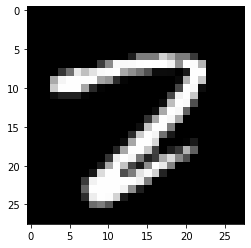

In [ ]:
# 예제 6.12 테스트 데이터 924번을 시각화하는 코드

index = 924
imageToUse = mnist.test.images[index]
imageLabel = mnist.test.labels[index]
print(imageToUse.shape)
print(imageLabel)
plt.imshow(np.reshape(imageToUse, [28,28]), interpolation="nearest", cmap="gray")

In [ ]:
# 예제 6.11을 924번에 대해 실행한 결과

print(imageLabel.argmax())
print(predict[0])
print(predict[0] == imageLabel.argmax())

2
7
False


In [ ]:
# 예제 6.13 합성곱 신경망이 테스트 데이터 924번을 어떻게 예측하는지 숫자별로 확률을 보여주는 코드

mat = sess.run(out_y, feed_dict={x: image_in, keep_prob: 1.0})[0]
count = 0
for i in mat:
    print('[{}] {:.2%}'.format(count, i))
    count += 1

[0] 0.01%
[1] 0.00%
[2] 0.00%
[3] 0.10%
[4] 0.00%
[5] 0.04%
[6] 0.00%
[7] 99.62%
[8] 0.04%
[9] 0.18%


In [ ]:
# 예제 6.14 이미지 하나가 특정 은닉층까지 통과한 결과물을 units 변수에 저장하고 호출하는 함수

def getActivations(layer, stimuli):
    units = sess.run(
        layer,
        feed_dict={
            x: np.reshape(stimuli, [1,784], order='F'),
            keep_prob:1.0})
    tf.shape(units)
    plotNNFilter(units)

In [ ]:
# 예제 6.15 은닉층 연산 결과를 시각화하는 코드

import math
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 5
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

<class 'int'> 5


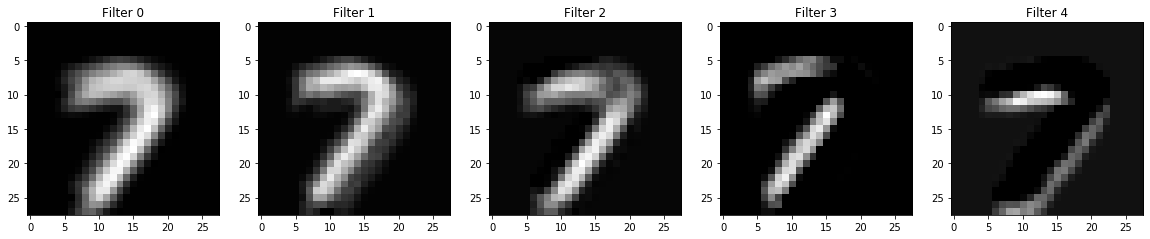

In [ ]:
# 예제 6.16 첫 번째 은닉층을 시각화하는 코드

getActivations(hidden_1, imageToUse)

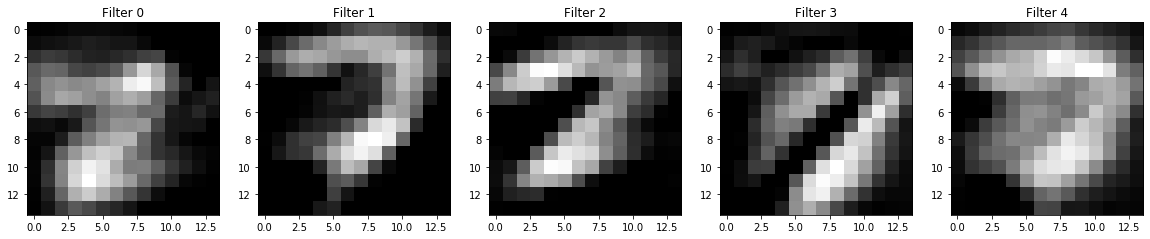

In [ ]:
# 예제 6.17 합성곱 신경망의 두 번째 은닉층을 시각화하는 코드

getActivations(hidden_2, imageToUse)

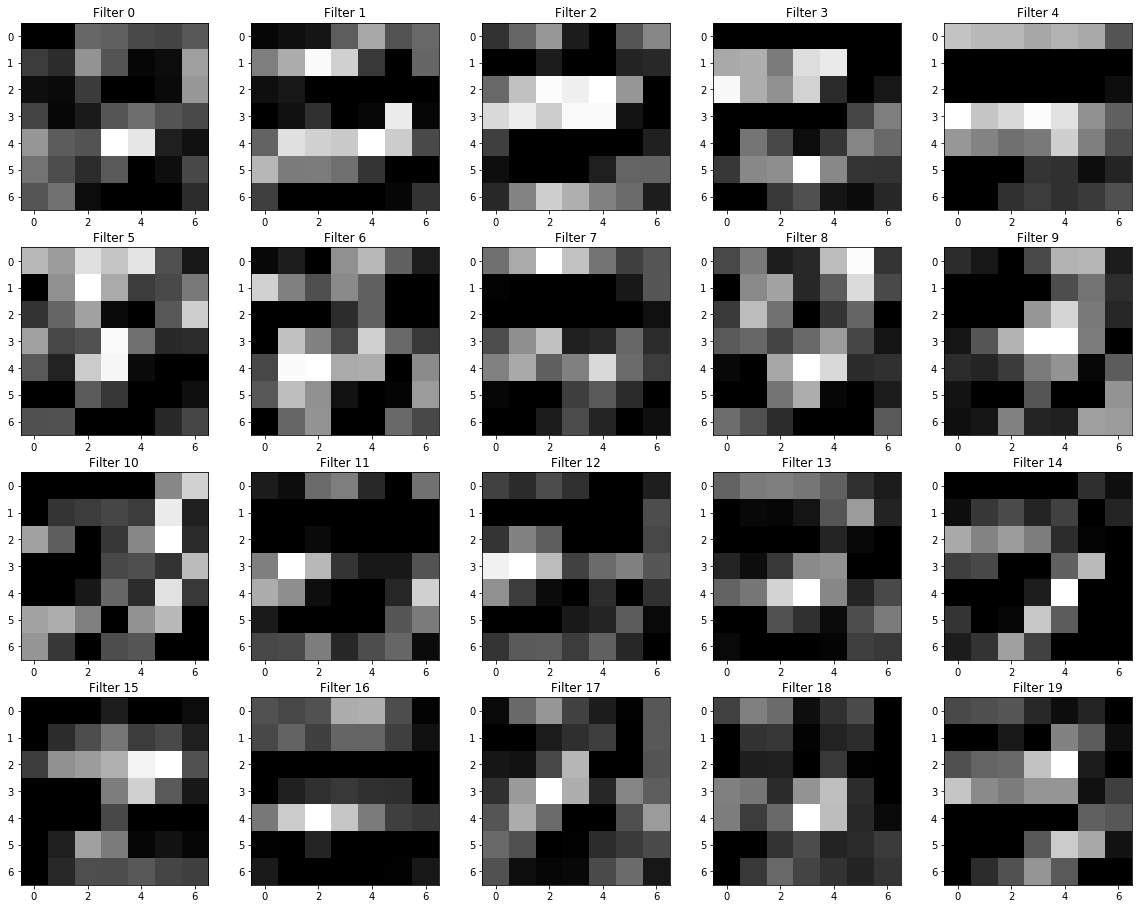

In [ ]:
# 예제 6.18 세 번째 은닉층을 시각화하는 코드

getActivations(hidden_3, imageToUse)

In [ ]:
# 예제 6.18 MNIST 손글씨 테스트 데이터베이스 223번째 데이터를 불러오는 코드

imageToUse = mnist.test.images[223]

In [ ]:
# 2개 이상의 데이터에 대한 필터 결과 출력

def getActivationsMulti(layer, stimulis):
    units = []
    for stim in stimulis:
        unit = sess.run(
            layer,
            feed_dict={
                x: np.reshape(stim, [1,784], order='F'),
                keep_prob:1.0})
        units.append(unit)
    units = np.concatenate(units, 3)
    plotNNFilter(units)

<class 'int'> 10


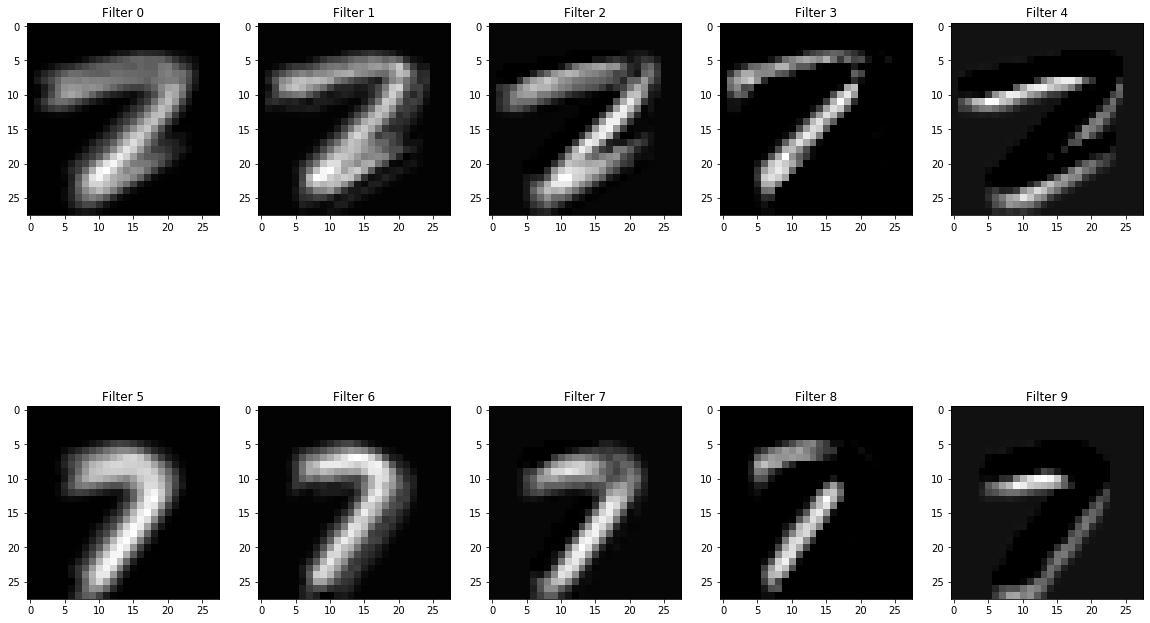

In [ ]:
getActivationsMulti(hidden_1, (mnist.test.images[924], mnist.test.images[223]))

<class 'int'> 10


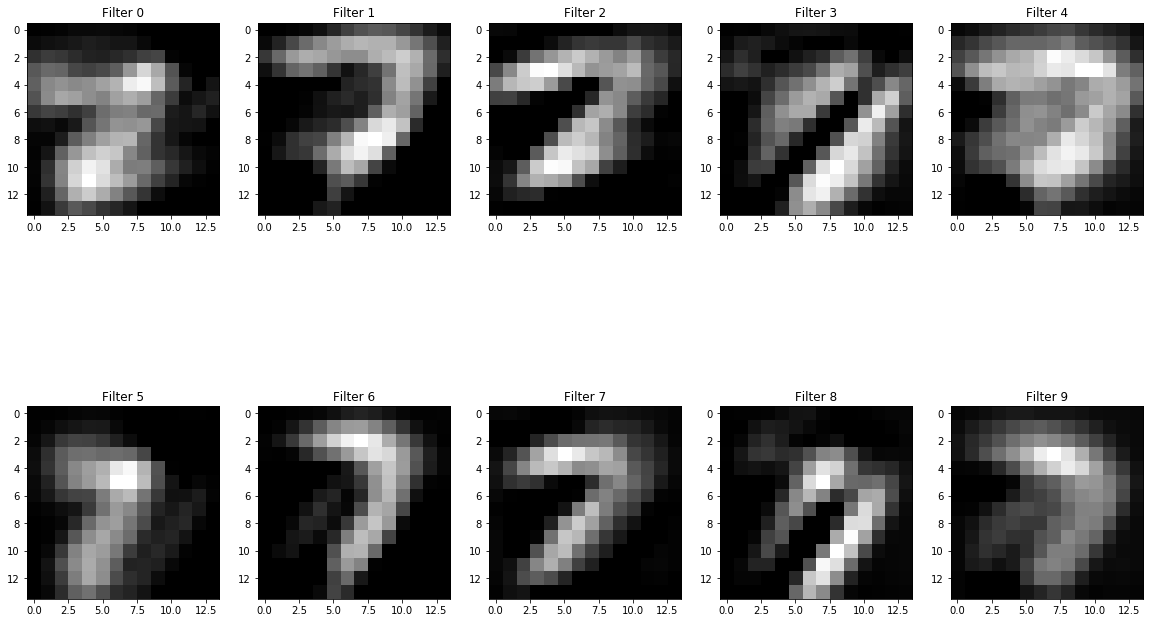

In [ ]:
getActivationsMulti(hidden_2, (mnist.test.images[924], mnist.test.images[223]))

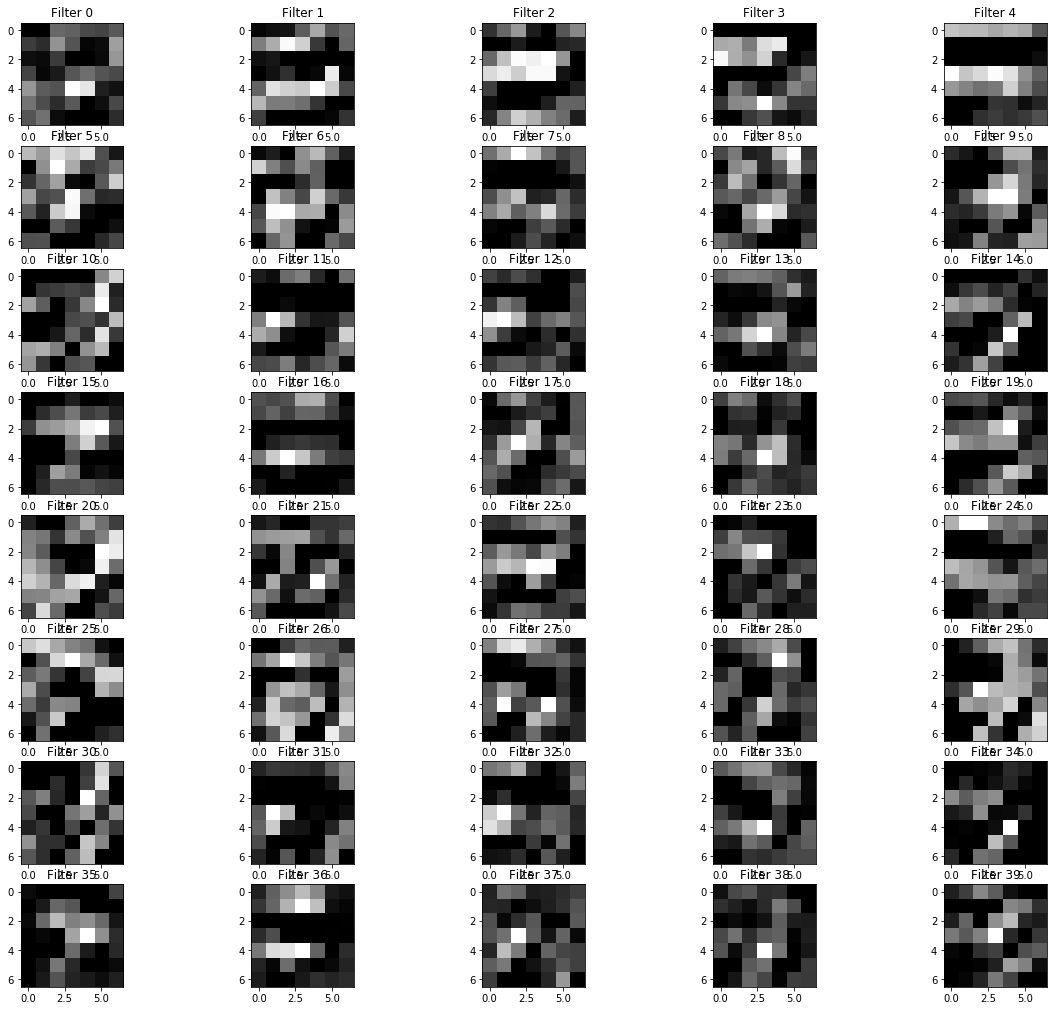

In [ ]:
getActivationsMulti(hidden_3, (mnist.test.images[924], mnist.test.images[223]))